In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import ifft2 
from classicalfield_orig_norm import FiniteTempGPE as gpe 
#from classicalfield_orig import FiniteTempGPE as gpe2 

The following cell tests for a long time window whether the simulation still has everything flow out or if it remains stable and to make sure the simulation itself also stays stable for long time periods. Make sure energy is conserved and then we can try to implement the larger potential energy for the full tracking simulation

Total Imag Time:  1.3227207660675049
kmax:  4.0212385965949355
T:  80.85179925372402
Norm:  445099.79022428684
(3, 128, 128)
(1, 128, 128)


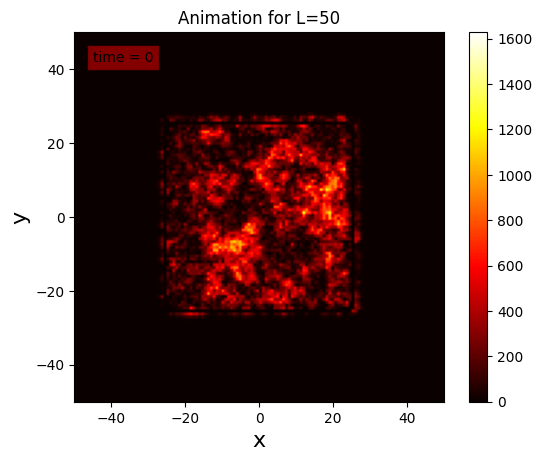

In [11]:
g = gpe(npoints = 2**6,  winMult = 2, numImagSteps = 2000, numRealSteps = 1500, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName='test', Tfact = 10, dst = False, vortex = True)

In [12]:
# look into normalization 
coef = g.L/g.dx**2
print("Total Number of Atoms: ", g.gpeobj.Natoms) 
noise_dens = np.abs(ifft2(coef * g.genPsiK()))**2 

print("Number of Atoms in Thermal Cloud: ", np.sum(noise_dens*g.dx**2))

print("Number of Atoms in Condensate: ", np.sum(np.abs(g.bec_wf_renormalized)**2*g.dx**2))
print("Total Summed: ", np.sum(noise_dens*g.dx**2)+ np.sum(np.abs(g.bec_wf_renormalized)**2*g.dx**2))



Total Number of Atoms:  640000
Number of Atoms in Thermal Cloud:  318854.36999343603
Number of Atoms in Condensate:  164822.0462141241
Total Summed:  483676.4162075601


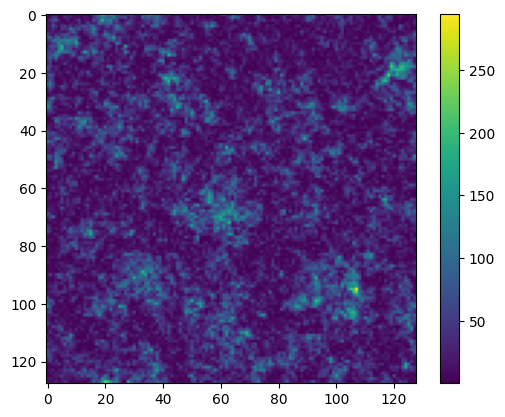

In [16]:
plt.imshow(noise_dens)
plt.colorbar() 

In [28]:
classical_temp = np.sqrt(np.divide(2*g.T,(g.ki[0]**2 + g.ki[1]**2),out = np.zeros_like(g.ki[0]), where=np.abs(g.ki[0]**2 + g.ki[1]**2)>1e-6))

(128, 128)
470780.1535481745
1048576.0


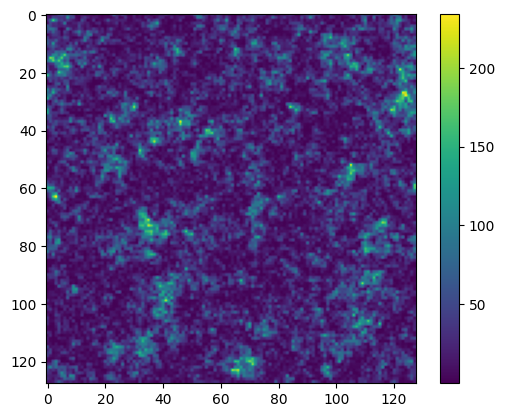

In [44]:
plt.imshow(np.abs(ifft2(coef*g.genPsiK()))**2)
plt.colorbar() 
print(np.shape(g.genPsiK()))
print(np.sum(np.abs(ifft2(coef*g.genPsiK()))**2))
print(np.sum(np.abs(g.gs)**2))
# something is not being normalized correctly... the distribution of psik has comparable maximum to the BEC but just high fluctuations - figure out where these fluctuations are coming from

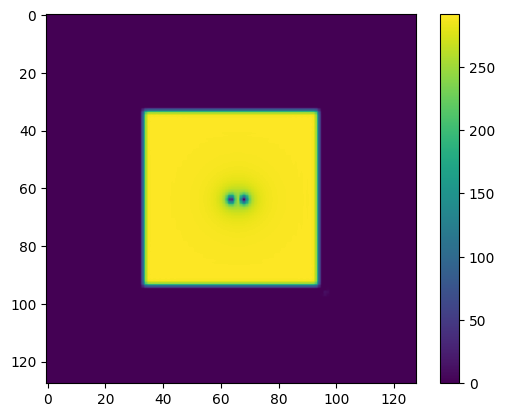

In [45]:
plt.imshow(np.abs(g.gs)**2)
plt.colorbar() 

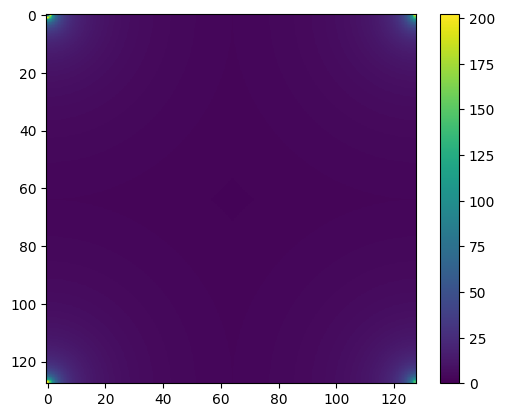

In [27]:
plt.imshow(np.sqrt(np.divide(2*g.T,(g.ki[0]**2 + g.ki[1]**2),out = np.zeros_like(g.ki[0]), where=np.abs(g.ki[0]**2 + g.ki[1]**2)>1e-6)))
plt.colorbar() 

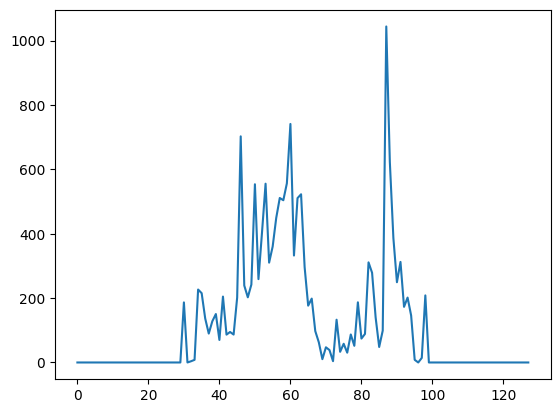

In [14]:
plt.plot(np.abs(g.snaps[0][50])**2)

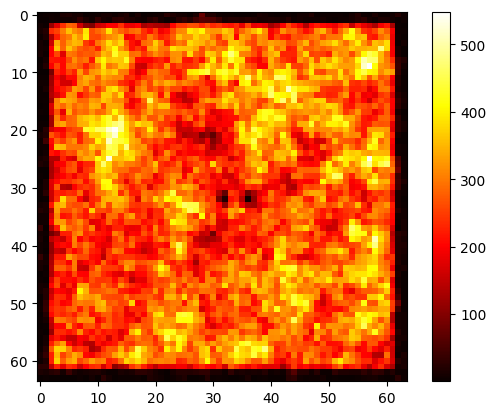

In [42]:
plt.figure() 
plt.imshow(np.abs(ifft2(coef*g.genPsiK()) + g.bec_wf_renormalized)**2, cmap = plt.cm.hot)
plt.colorbar() 


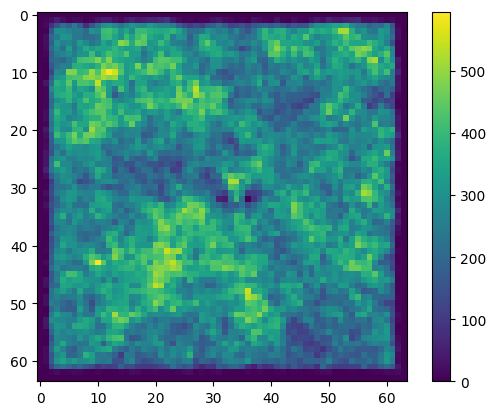

In [43]:
plt.figure() 
plt.imshow(np.abs(g.snaps[0])**2)
plt.colorbar() 

In [44]:
dens = np.abs(ifft2(coef*g.genPsiK()) + g.bec_wf_renormalized)**2

In [45]:
print(np.where(dens == np.max(dens)))

(array([22], dtype=int64), array([52], dtype=int64))


In [49]:
print(1/g.gpeobj.g)

256.0


In [5]:
plt.figure() 
plt.plot(dens[len(dens)//2])

NameError: name 'dens' is not defined

<Figure size 640x480 with 0 Axes>

In [5]:
# BKT transition temperature
print((1/g.gpeobj.g)*np.pi/2)

402.1238596594935


In [1]:
print(120/25)

4.8


118.39932231476159
304.2423
2.5696288088667605


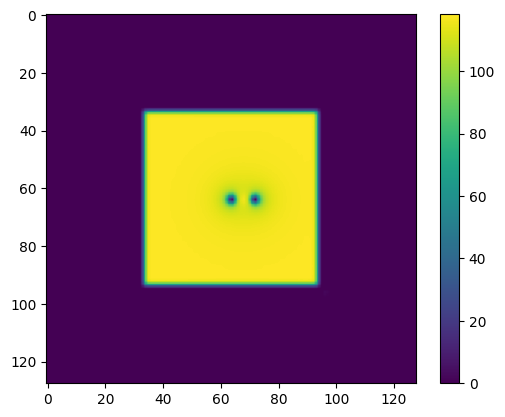

In [7]:
plt.imshow(np.abs(g.gpeobj.psi)**2) 
plt.colorbar() 
print(np.max(np.abs(g.gpeobj.psi)**2))
print(np.max(np.abs(g.snaps[-1])**2))
print(np.max(np.abs(g.snaps[-1])**2)/np.max(np.abs(g.gpeobj.psi)**2))

In [65]:
print(g.gpeobj.Natoms)
print(g.dx) 

64000
3.125


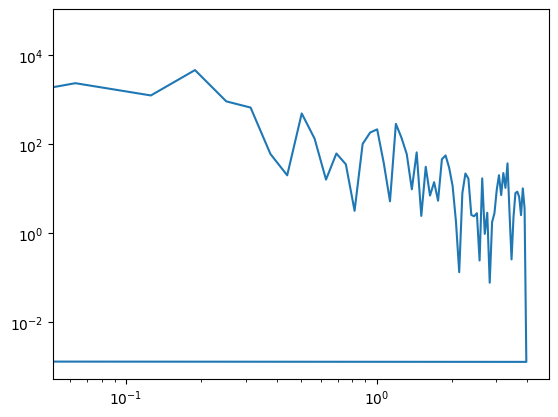

In [3]:
psik = g.genPsiK() 

plt.plot(g.ki[0][0], np.abs(psik[0])**2)
plt.yscale('log')
plt.xscale('log')

In [6]:
print(np.sum(np.abs(ifft2(g.L/g.dx**2*psik))**2))
print(g.gpeobj.Natoms) 

228207.43082005583
640000


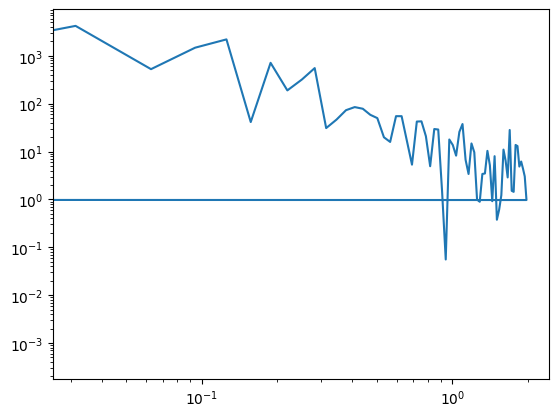

In [91]:
psik = g.genPsiK() 

plt.plot(g.ki[0][0], np.abs(psik[0])**2)
plt.yscale('log')
plt.xscale('log')

Test to see if when we raise the potential well that the simulation remains stable and the atoms are still in the box

Total Imag Time:  1.338773250579834
kmax:  4.0212385965949355
T:  8.085179925372403
(1501, 128, 128)
(1, 128, 128)


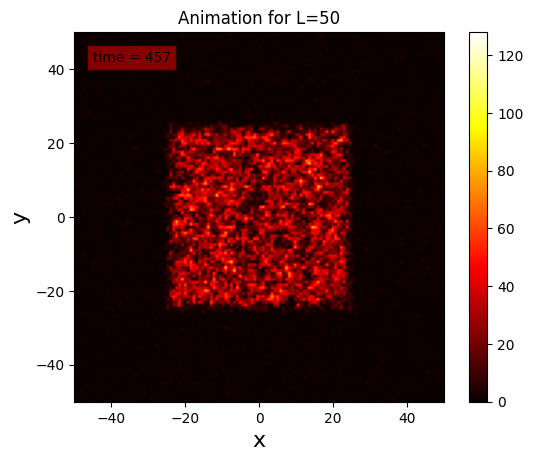

In [12]:
g = gpe2(npoints = 2**6, numImagSteps = 2000, numRealSteps = 1500000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName='test', Tfact = 1, dst = False, vortex = True)

In [19]:
dt = 0.00030517578125


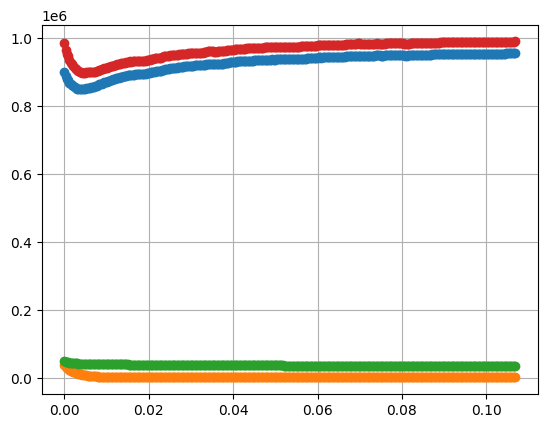

In [20]:
time = dt*np.linspace(0, len(g.Ek_arr), len(g.Ek_arr))
plt.plot(time, np.abs(g.Ek_arr), marker = 'o')
plt.plot(time, np.abs(g.Ep_arr), marker = 'o')
plt.plot(time, np.abs(g.Ei_arr), marker = 'o')
plt.plot(time, np.abs(g.Ep_arr) + np.abs(g.Ek_arr) + np.abs(g.Ei_arr), marker = 'o')
plt.grid(True) 

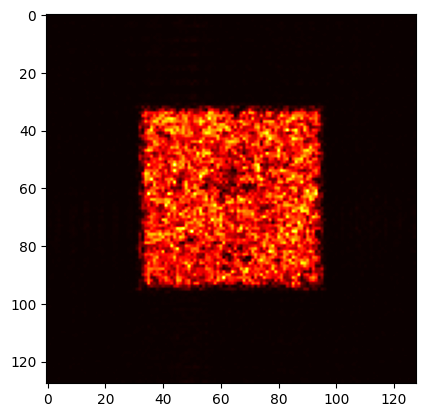

In [11]:
plt.imshow(np.abs(g.snaps[-1])**2, cmap = plt.cm.hot)


### Test coefficient 

In [10]:
from scipy.fft import ifft2

In [27]:
print(g.gpeobj.Natoms) 

64000


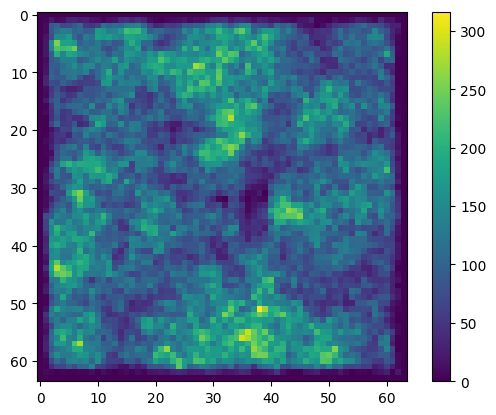

In [31]:
plt.figure() 
plt.imshow(np.abs(g.snaps[0])**2)
plt.colorbar() 

Notes: Find the BKT transition temperature 

In [38]:
E0 = 1/g.gpeobj.g*np.pi 
print(E0/2) 



40.21238596594935


In [28]:

arr = g.snaps[0]
N = len(arr[0]) * len(arr)
L = len(arr)
dx = L/np.sqrt(N)

psik = L/dx**2 * np.sqrt(arr) 


In [29]:
psix = ifft2(psik) 
print(np.sum(np.abs(psix)**2)) 

# at higher temperatures there is a higher ratio of atoms in the thermal cloud but the number of atoms in the condensate stays constant - this could be something to fix 
# find out how many atoms are in the thermal cloud at a reasonable amount of temperature and make sure the number of atoms is conserved 

38701.75
